<a href="https://colab.research.google.com/github/GladysJoseph/github_python_repo/blob/main/Boston_Elective_project__update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gladys Joseph
                 ##**Elective  Project**





                  ##**Boston Housing**






                   **Changed Dataset- August 14, 2023**  


##**Objective**  
The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features affecting the price of the house. We will employ linear regression model, polynomial regression Model and Cross validataions that predict the prices for the unseen data. The final analysis  model's performance metrics provides valuable information about its potential to predict housing prices.

##**Exploratory Analysis**


The Boston Housing dataset comprises 506 rows and 13 columns, with data types ranging from integers for variables like CHAS, RAD, and TAX, to floats for CRIM, ZN, INDUS, NOX, RM, AGE, DIS, PTRATIO, LSTAT, and MEDV. Summary statistics reveal the distribution characteristics of these variables, with CRIM ranging from 0.006 to 88.97, ZN from 0.00 to 100.00, INDUS from 0.4600 to 27.74, and so on. Correlation analysis highlights positive associations between attributes like 'RM' and 'MEDV', 'ZN' and 'DIS', 'INDUS' and 'TAX', 'AGE' and 'NOX', as well as negative correlations between 'DIS' and 'NOX', 'DIS' and 'AGE', 'NOX' and 'DIS', 'TAX' and 'INDUS', 'TAX' and 'RAD'. The data distribution displays positive left skewness with longer tails on the right side, and the kurtosis of 37.13 suggests heavy-tailedness and potential outliers. Further, bivariate analysis underscores the relationship between variables like MEDV, CRIM, INDUS, RM, TAX, PTRATIO, and LSTAT, revealing varying concentrations, fluctuations, and the presence of outliers in the dataset. These insights collectively offer valuable perspectives for understanding the dataset's characteristics and trends.

##**Dataset**

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric Oxide concentration (parts per 10 million)

RM: The average number of rooms per dwelling

AGE: Proportion of owner-occupied units built before 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property-tax rate per 10,000 dollars

PTRATIO: Pupil-teacher ratio by town

LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in 1000 dollars


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')


**Observation**
Load Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##uploading dataset and reading it through my drive

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Boston.csv')

In [ ]:

 #Copying data to another variable to avoid any changes to the original data
data= data.copy()

In [ ]:
#Looking at head (observations)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


##**Exploratory analysis of data**

  **Observation** Data has 13 variables, MEDV is the target variable All values numerical and floats

In [ ]:
#Checking the shape of the dataset -feature count and rows
data.shape

(506, 13)

**Observation**

There are 13 columns and rows are equal to 506

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observation**

13 variables
data types for CHAS, RAD, TAX: int
datatype for CRIM, ZN, INDUS, NOX, RM, AGE, DIS, PTRATIO, LSTAT AND MEDV ARE = TO FLOATS


In [ ]:
data.isnull

<bound method DataFrame.isnull of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  MEDV  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2    

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64


**OBSERVATION**

There are no missing data

data.isnull(sum)

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


##**SUMMARY STATISTICS**

CRIM	- minumun number is .006, the mean value is 3.61%, 75% of data is 3.6, max 88.97

ZN	- minumun number is 0.00, the mean value is 11.36%, 75% of data is 12.50%, max 100.00

INDUS	- minumun number is .4600, the mean value is 11.36, 75% of data is 10.12%, max 27.74

CHAS	- minumun number is .000, the mean value is 0.0691, 75% of data is 0.00%, max 1.00

NOX	- minumun number is .385, the mean value is 6.28%, 75% of data is 0.62%, max 0.87

RM	- minumun number is 3.56., the mean value is 6.28%, 75% of data is 6.62%, max 8.78

AGE	- minumun number is 2.90, the mean value is 68.57%, 75% of data is 94.07%, max 100.00

DIS	- minumun number is 1.129, the mean value is 3.79%, 75% of data is  5.18%, max 12.12

RAD	- minumun number is 1.00, the mean value is 9.549%, 75% of data is 24.00%, max 24.00

TAX	- minumun number is 1.87, the mean value is 408.23%, 75% of data is 666.00%, max 711.00

PTRATIO	- minumun number is 12.6, the mean value is 18.48%, 75% of data is 20.20%, max 22.00

LSTAT	- minumun number is 1.73, the mean value is 12.65%, 75% of data is 16.95%, max 37.97

MEDV- minumun number is 5.00, the mean value is 22.53%, 75% of data is 25.00%, max 50.00



##**Correlation**


In [ ]:
data.corr

<bound method DataFrame.corr of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  MEDV  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2      

<Axes: >

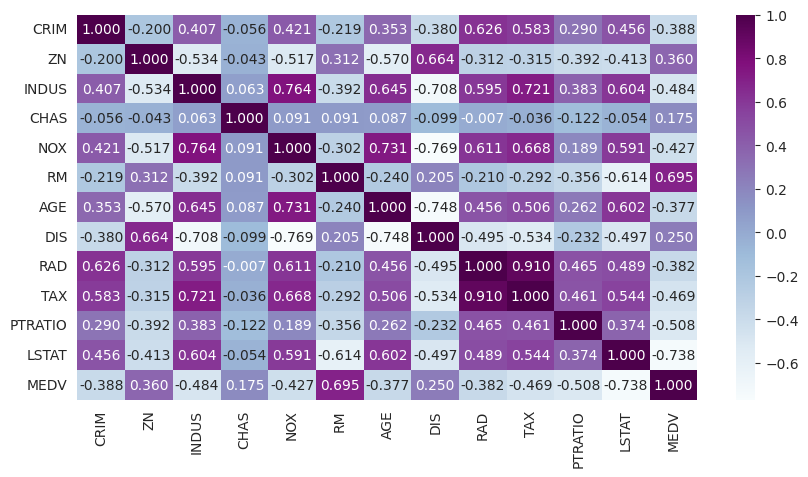

In [ ]:
from numpy.ma.core import correlate

# Plot the heatmap
num_var = ['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT','MEDV']
corr = data[num_var].corr()
plt.figure(figsize = (10,5))
sns.heatmap(corr, annot = True, cmap = 'BuPu',
        fmt = ".3f",
        xticklabels = corr.columns,
        yticklabels = corr.columns)



**Observation- correlations**

Although corelations  indicate insights into relations, they do not imply causation.


Positive

'RM' (average number of rooms) and 'MEDV' (median value of owner-occupied homes): 0.70

'ZN' (proportion of residential land zoned for lots over 25,000 sq.ft.) and

'DIS' (weighted distances to five Boston employment centers): 0.66

'INDUS' (proportion of non-retail business acres per town) and 'TAX' (full-value property-tax rate per $10,000): 0.72

'AGE' (proportion of owner-occupied units built prior to 1940) and 'NOX' (nitric oxides concentration): 0.73

Negative:

'DIS' (weighted distances to five Boston employment centers) and 'NOX' (nitric oxides concentration): -0.77

'DIS' (weighted distances to five Boston employment centers) and 'AGE' (proportion of owner-occupied units built prior to 1940): -0.75

'NOX' (nitric oxides concentration) and 'DIS' (weighted distances to five Boston employment centers): -0.77

'TAX' (full-value property-tax rate per $10,000) and 'INDUS' (proportion of non-retail business acres per town): -0.72

'TAX' (full-value property-tax rate per $10,000) and 'RAD' (index of accessibility to radial highways): -0.38

##**Univarite Analysis**








In [ ]:
# we are going to define this code so we can re-use it for every feature.
def histogram_boxplot_fun (df, feature):                                                           #lastly            def histogram_boxplot_fun (df, feature, kde= False, bins = 23):
    fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
    sns.boxplot(data=df, x=feature, showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
    sns.histplot(data= df, x=feature, bins = 23, kde= False, ax=ax[1])  #Step 4 fill the 2nd box with the histogram viz
    ax[1].axvline(df[feature].mean(), linestyle = '--', color = 'green') # enhance with median line and color
    ax[1].axvline(df[feature].median(), linestyle = '-.', color='black')

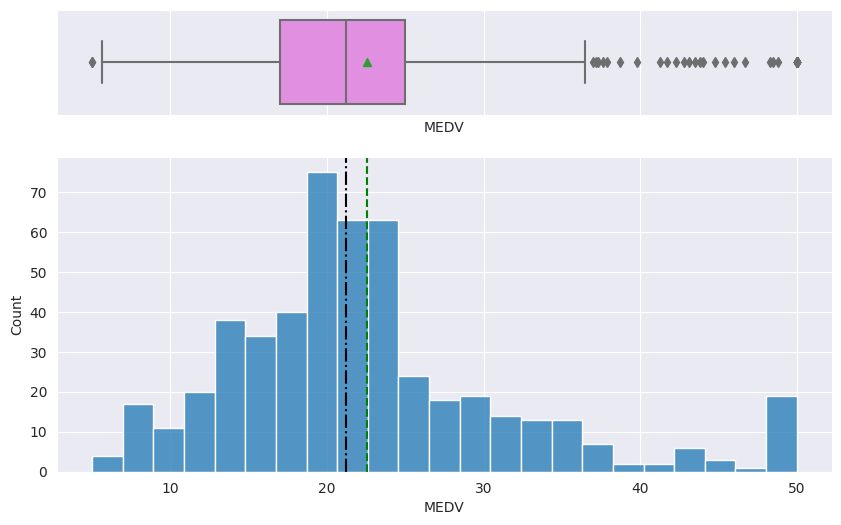

In [ ]:
from ipywidgets.widgets.widget_int import Color
# step 1-add fig ax for the 1st viz to the 1/3
fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
sns.boxplot(data=data, x='MEDV', showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
sns.histplot(data= data, x='MEDV', bins = 23, kde= False, ax=ax[1])  #Step 4 fill the 2nd box with the histogram viz
#if you want to add vertical or horizontal line in the plots for the median  axvline- verticle or axhline- horizontal
#ax[1].axvline(data['Goals_Scored'].mean()) this basic solid line
ax[1].axvline(data['MEDV'].mean(), linestyle = '--', color = 'green') # enhance with median line and color
ax[1].axvline(data['MEDV'].median(), linestyle ='-.', color='black')


#Visual 1

In [ ]:
print("Skewness: %f" % data['MEDV'].skew())
print("Kurtosis: %f" % data['MEDV'].kurt())

Skewness: 1.108098
Kurtosis: 1.495197




**OBSERVATION**

The positive left skewness, data has  longeer tail on the right side of the distrution, majority of data concentrated on the left side.  values are more spread out towards higher values.

Kurtosis of 1.49 , data has lighter tails and is less peaked compared to normal distribution less peaked thatn normal distribution


**Observation**




Skewness: 5.223149
Kurtosis: 37.130509


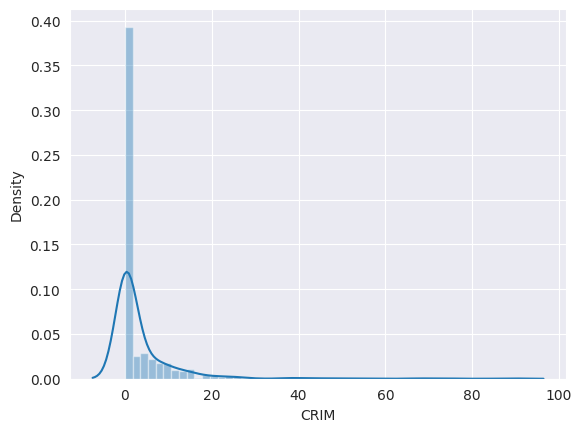

In [ ]:
sns.distplot(data['CRIM'])
print("Skewness: %f" % data['CRIM'].skew())
print("Kurtosis: %f" % data['CRIM'].kurt())
#Visual 2

**OBSERVATIONS**
of 5.223149 suggests a significant positive skew, indicating a highly skewed distribution with a long tail on the right side.

37.130509 suggests a high kurtosis, indicating a distribution with heavy tails and potentially more outliers or extreme values compared to a normal distribution.
 (skewness: 5.223149, kurtosis: 37.130509) indicate that the distribution of your dataset is highly skewed to the right and has heavy tails, potentially containing outliers or extreme values. This suggests that the dataset might deviate significantly from a normal distribution


<Axes: xlabel='INDUS', ylabel='Count'>

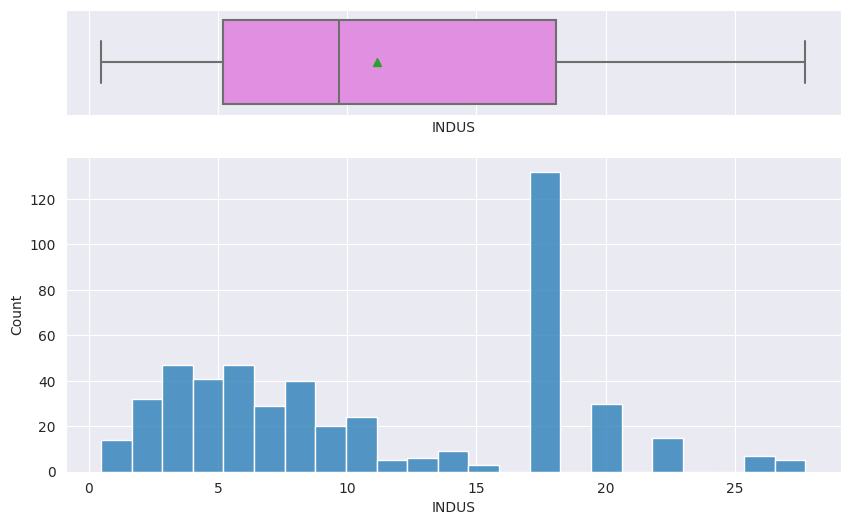

In [ ]:
fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
sns.boxplot(data=data, x='INDUS', showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
sns.histplot(data= data, x='INDUS', bins = 23, kde= False, ax=ax[1])
#Step 4 fill the 2nd box with the histogram viz
# added vertical or horizontal line in the plots for the median  axvline- verticle or axhline- horizontal
#ax[1].axvline(df['horsepower'].mean()) this basic solid line
#visual 3

**OBSERVATIONS**

The distribution is skewed slighlty right skewed , longer right tail
extreme variable between 15-20

<Axes: xlabel='RM', ylabel='Density'>

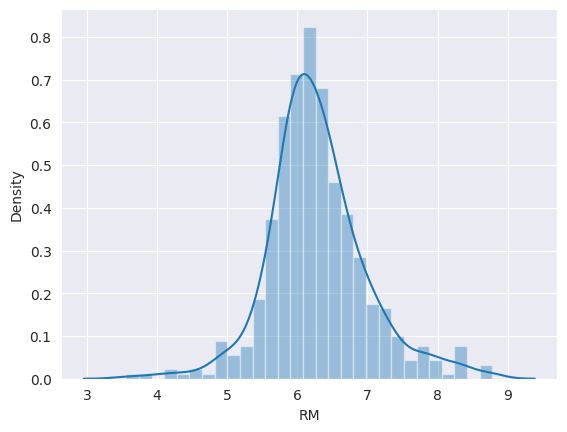

In [ ]:
sns.distplot(data['RM'])
#visual 6

**OBSERVATION**

The distribution has mild to moderate right-skewness, suggesting the presence of larger values on the right side of the distribution.
The distribution has heavy tails and is more peaked compared to a normal distribution.

<Axes: xlabel='AGE', ylabel='Count'>

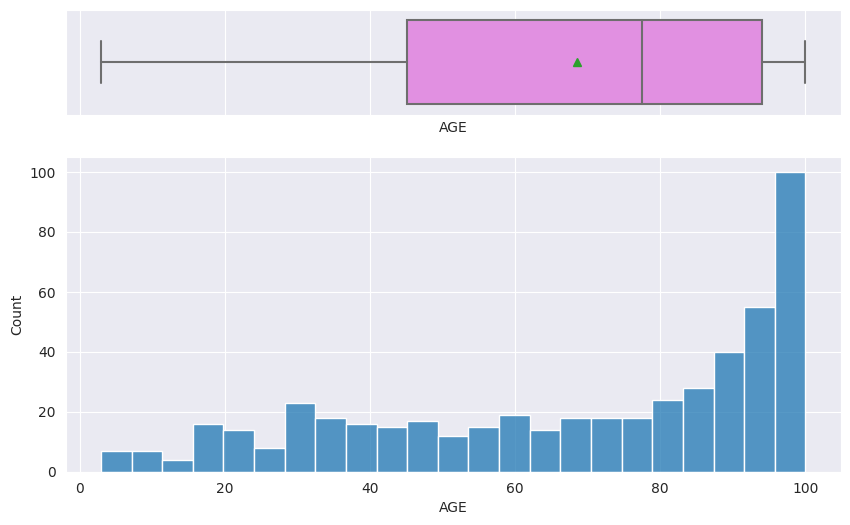

In [ ]:
fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
sns.boxplot(data=data, x='AGE', showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
sns.histplot(data= data, x='AGE', bins = 23, kde= False, ax=ax[1])  #Step 4 fill the 2nd box with the histogram viz
# added vertical or horizontal line in the plots for the median  axvline- verticle or axhline- horizontal
#ax[1].axvline(df['horsepower'].mean()) this basic solid line

#visual #7

In [ ]:
print("Skewness: %f" % data['AGE'].skew())
print("Kurtosis: %f" % data['AGE'].kurt())

Skewness: -0.598963
Kurtosis: -0.967716


**Observation**

negative skewness indicates that the left tail of the distribution is longer or stretched compared to the right side.
small values on the left side of the distribution that are pulling the mean towards that direction.
 the distribution has lighter tails and is less peaked than a normal distribution. This can indicate that the data has a more moderate range of values and is not prone to having extreme values.

<Axes: xlabel='DIS', ylabel='Count'>

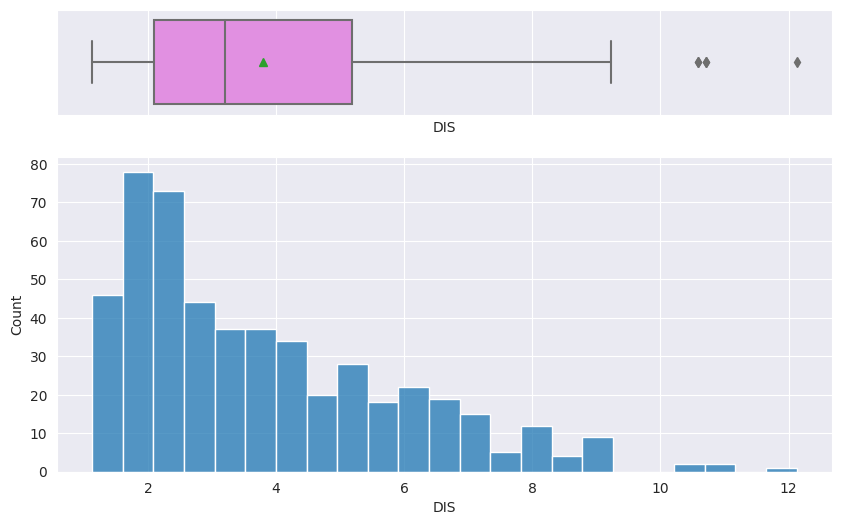

In [ ]:
fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
sns.boxplot(data=data, x='DIS', showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
sns.histplot(data= data, x='DIS', bins = 23, kde= False, ax=ax[1])  #Step 4 fill the 2nd box with the histogram viz
# added vertical or horizontal line in the plots for the median  axvline- verticle or axhline- horizontal
#ax[1].axvline(df['horsepower'].mean()) this basic solid line

**OBSERVATION**

The distribution is right-skewed, meaning it has a longer right tail and some relatively large values on the right side.
The distribution has a moderate degree of heavy tails and is slightly more peaked compared to a normal distribution.

<Axes: xlabel='NOX', ylabel='Count'>

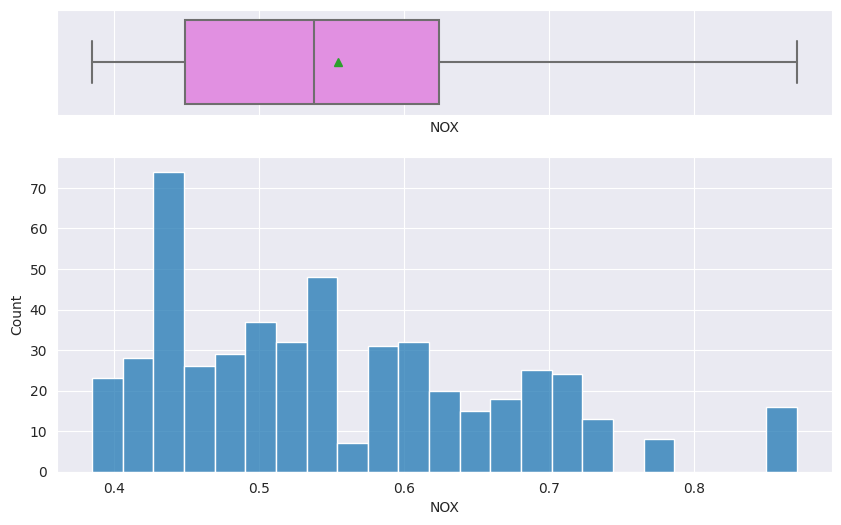

In [ ]:
fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
sns.boxplot(data=data, x='NOX', showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
sns.histplot(data= data, x='NOX', bins = 23, kde= False, ax=ax[1])  #Step 4 fill the 2nd box with the histogram viz
# added vertical or horizontal line in the plots for the median  axvline- verticle or axhline- horizontal
#ax[1].axvline(df['horsepower'].mean()) this basic solid line

**OBSERVATION**
The distribution is moderately right-skewed, suggesting some larger values on the right side of the distribution.
The distribution has lighter tails and is less peaked compared to a normal distribution.

<Axes: xlabel='RAD', ylabel='Count'>

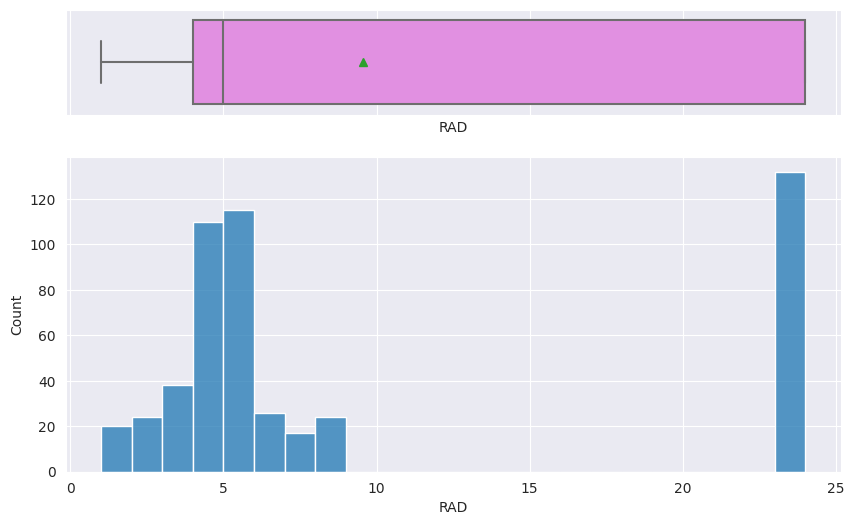

In [ ]:
fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
sns.boxplot(data=data, x='RAD', showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
sns.histplot(data= data, x='RAD', bins = 23, kde= False, ax=ax[1])  #Step 4 fill the 2nd box with the histogram viz
# added vertical or horizontal line in the plots for the median  axvline- verticle or axhline- horizontal
#ax[1].axvline(df['horsepower'].mean()) this basic solid line

**OBSERVATION**

The distribution is moderately to highly right-skewed, suggesting the presence of larger values on the right side of the distribution.
The distribution has lighter tails and is less peaked compared to a normal distribution.

<Axes: xlabel='TAX', ylabel='Density'>

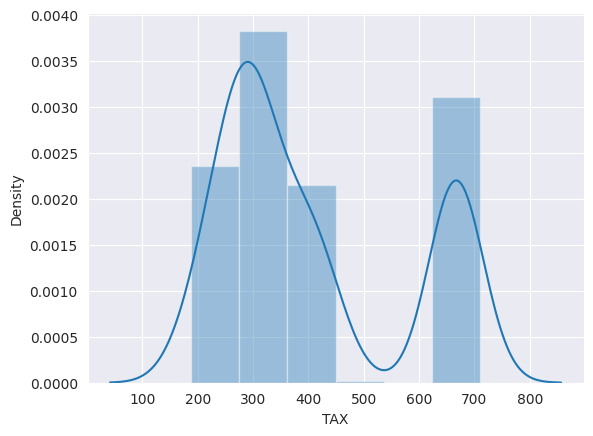

In [ ]:
sns.distplot(data['TAX'])

**OBSERVATION**

The distribution is moderately right-skewed, suggesting the presence of larger values on the right side of the distribution.
The distribution has lighter tails and is less peaked compared to a normal distribution.

<Axes: xlabel='PTRATIO', ylabel='Count'>

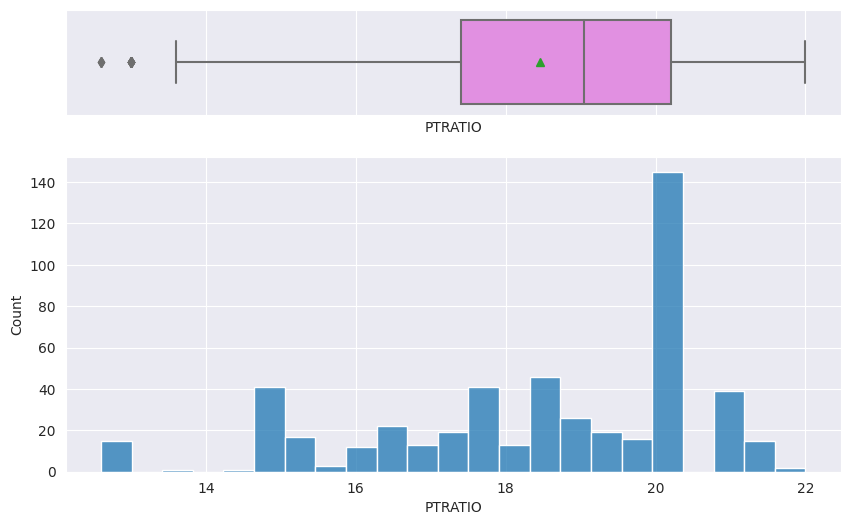

In [ ]:
fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
sns.boxplot(data=data, x='PTRATIO', showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
sns.histplot(data= data, x='PTRATIO', bins = 23, kde= False, ax=ax[1])  #Step 4 fill the 2nd box with the histogram viz
# added vertical or horizontal line in the plots for the median  axvline- verticle or axhline- horizontal
#ax[1].axvline(df['horsepower'].mean()) this basic solid line

**OBSERVATION**

The distribution is moderately left-skewed, suggesting the presence of smaller values on the left side of the distribution.
The distribution has lighter tails and is less peaked compared to a normal distribution.

<Axes: xlabel='LSTAT', ylabel='Count'>

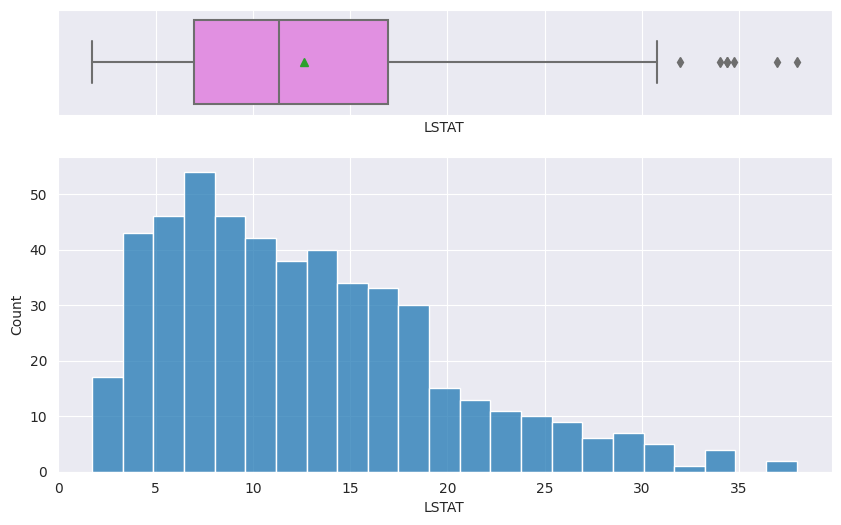

In [ ]:
fig, ax =plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(1,3)}, figsize=(10,6))
sns.boxplot(data=data, x='LSTAT', showmeans = True, color='violet', ax=ax[0])          # step 2- bring down the boxplot snscode     step 3 ax= [0]that the 1st spot
sns.histplot(data= data, x='LSTAT', bins = 23, kde= False, ax=ax[1])  #Step 4 fill the 2nd box with the histogram viz
# added vertical or horizontal line in the plots for the median  axvline- verticle or axhline- horizontal
#ax[1].axvline(df['horsepower'].mean()) this basic solid line

**OBSERVATION**

The distribution is moderately to highly right-skewed, suggesting the presence of larger values on the right side of the distribution.
The distribution has slightly heavier tails and is slightly more peaked compared to a normal distribution.

---




##**Bivarite Analysis**


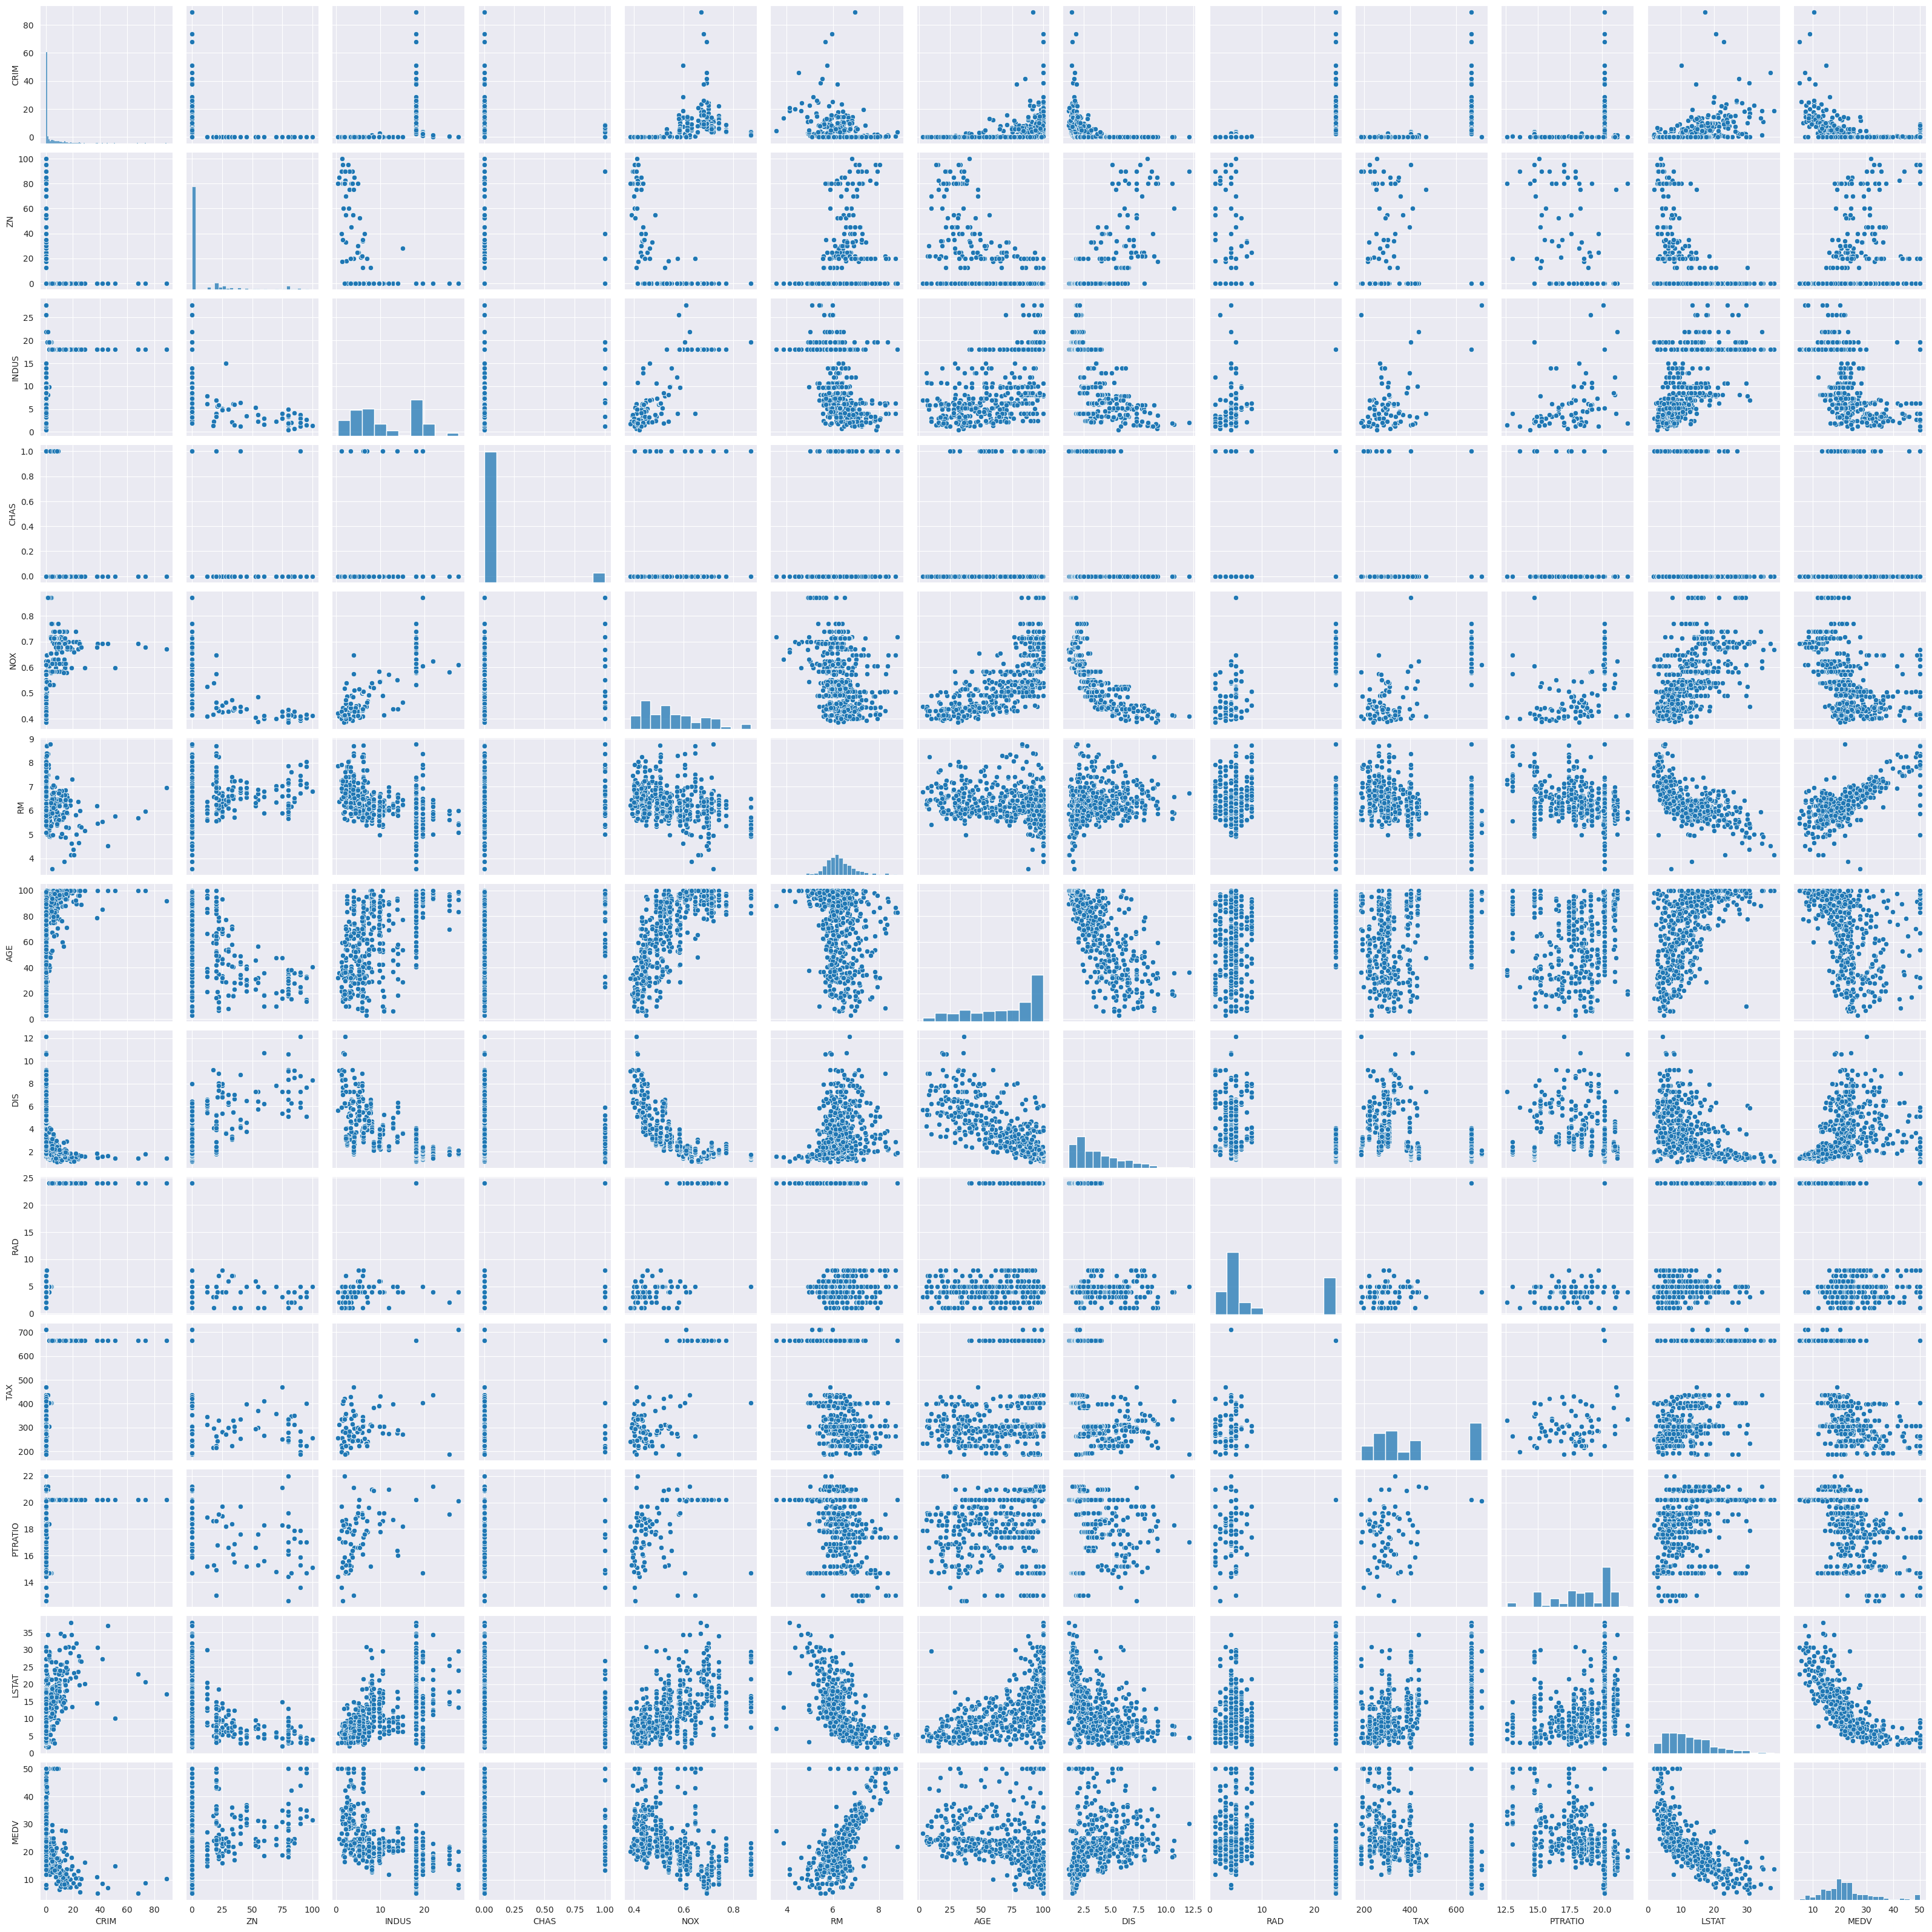

In [ ]:
sns.pairplot(data)
plt.show()

**Bivarite analysis repeat**

   

In [ ]:
 #Copying data to another variable to avoid any changes to the original data
data_1= data.copy()

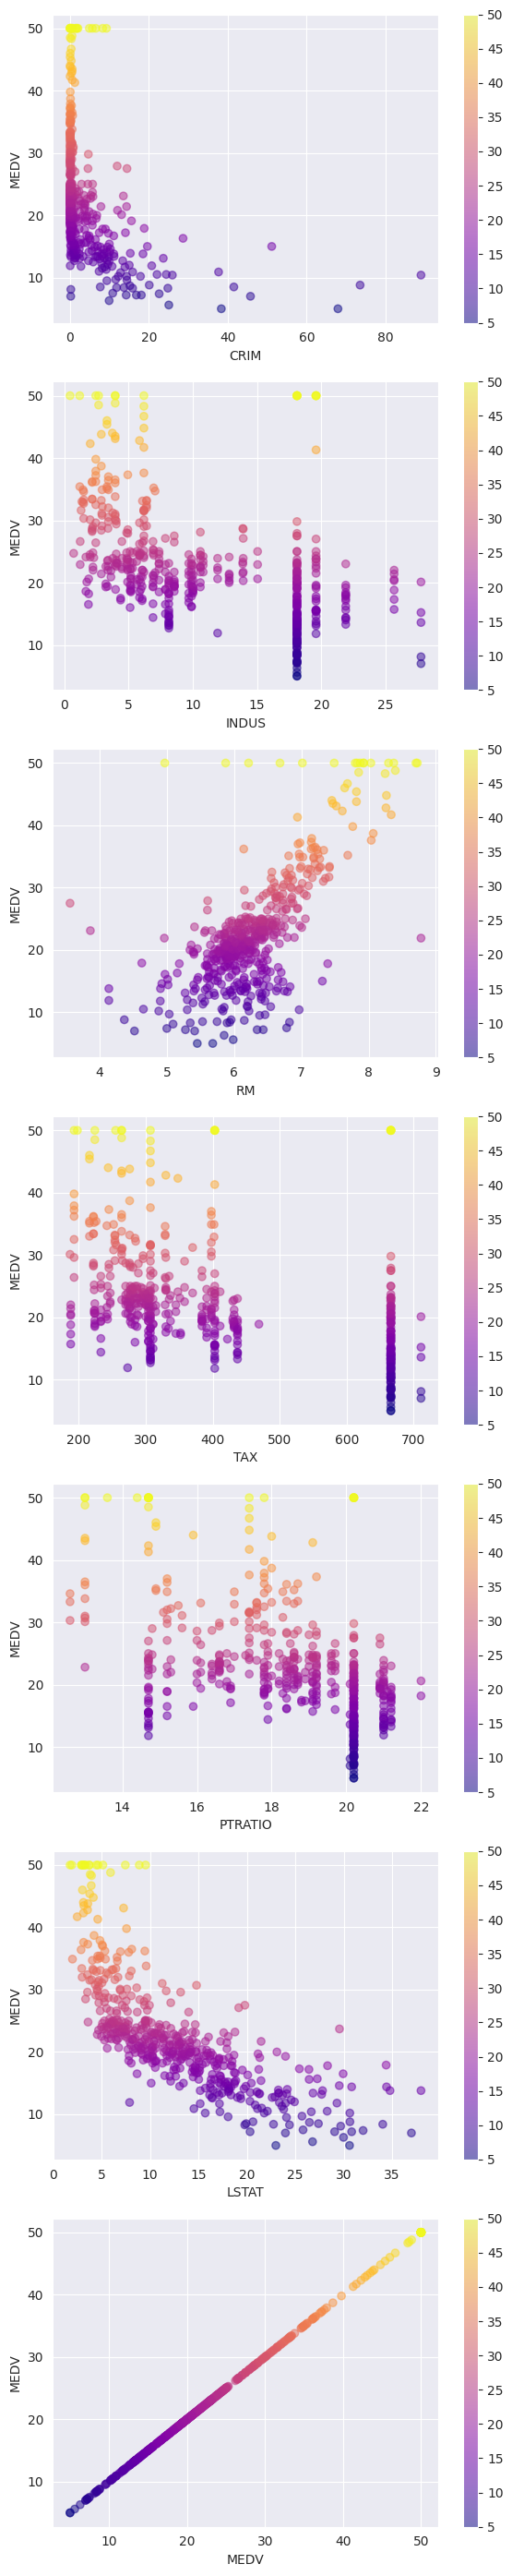

In [ ]:
import matplotlib.pyplot as plt

# Select specific columns
selected_columns = ['CRIM', 'INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']

data_selected = data_1[selected_columns]

fig, axs = plt.subplots(len(selected_columns), 1, figsize=(6, 4 * len(selected_columns)))

# Define a colormap for 'MEDV'
cmap = plt.cm.get_cmap('plasma')

for i, var in enumerate(selected_columns):
    ax = axs[i]
    sc = ax.scatter(data_selected[var], data_selected['MEDV'], c=data_selected['MEDV'], cmap=cmap, alpha=0.5)
    ax.set_xlabel(var)
    ax.set_ylabel('MEDV')
    fig.colorbar(sc, ax=ax)

plt.tight_layout()
plt.show()


**OBSERVATION**

MEDV VS SCRIM- 0- 20see the highest concentration, Above 20 there are outliers.  

MEDV VS INDUS- 0-10 high concentration 18-20 with outliers

MEDV VS RM- 5-7 bedroom, outliers in the data

MEDV VS TAX-concentration 0-450 with outliers

MEDV VS PTRATIO- 15-21 fluctates with out of outliers

MEDV VS LSTAT- data numerical value concentration 0-20in order of increase high to decrease while going low.





In [ ]:
# 'data' is the DataFrame containing your data and 'num_var' is a list of numeric variables
data = pd.DataFrame()
data_1 = ['CRIM', 'INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']  #   numeric variable names



# Print the new DataFrame
print(data_1)

['CRIM', 'INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
data_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Boston.csv')

# Select specific columns
selected_columns = ['CRIM', 'INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
data_selected = data_1[selected_columns]

# Define the target variable
predict = "MEDV"

# Separate features (X) and target (y)
X = data_selected.drop([predict], axis=1)
y = data_selected[predict]

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)




In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# create a linear Regression

# Load the dataset
data_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Boston.csv')

# Select specific columns
selected_columns = ['CRIM', 'INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
data_selected = data_1[selected_columns]

# Define the target variable
predict = "MEDV"

# Separate features (X) and target (y)
X = data_selected.drop([predict], axis=1)
y = data_selected[predict]

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets (80/20 split)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)


# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 28.5095737431242
R-squared: 0.6112354700043727


**OBSERVATION**

lINEAR REGRESSION - Using integers values- split data X & Y(80/20), prediction using MEDV

Print theMean Squared Error: 28.5095737431242
R-squared: 0.6112354700043727

The linear regression model is capturing a reasonable amount of the variance in the target variable with an R-squared of 0.611.  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
####validation
# Load the dataset
data_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Boston.csv')

# Select specific columns
selected_columns = ['CRIM', 'INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
data_selected = data_1[selected_columns]

# Define the target variable
predict = "MEDV"

# Separate features (X) and target (y)
X = data_selected.drop([predict], axis=1)
y = data_selected[predict]

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets (80/20 split)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # You can change cv value as needed

# Display results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Mean Squared Error: 28.5095737431242
R-squared: 0.6112354700043727
Cross-Validation Scores: [ 0.71585416  0.6997749   0.54001817  0.05884684 -0.13297091]
Mean Cross-Validation Score: 0.3763046333858507


**OBSERVATION**

validataion cross validation model, using the same features from the linear regression.  splitting data  80/20.  

The R-squared value of 0.611 suggests that your model is capturing a significant portion of the variance in the target variable. The range of scores (from positive to negative) indicates that the model's performance varies across different folds.
The mean cross-validation score of 0.376 indicates the average performance of your model across all folds

##**Compare Results**

In [ ]:
import numpy as np

# Metrics for Model 1
mse_1 = 28.5095737431242
r2_1 = 0.6112354700043727

# Metrics for Model 2
mse_2 = 28.5095737431242
r2_2 = 0.6112354700043727
cv_scores_2 = np.array([0.71585416, 0.6997749, 0.54001817, 0.05884684, -0.13297091])
mean_cv_score_2 = cv_scores_2.mean()

# Compare the models
if r2_1 > r2_2 and mean_cv_score_2 > 0:
    print("Model 1 is the best fit.")
elif r2_2 > r2_1 and mean_cv_score_2 > 0:
    print("Model 2 is the best fit.")
else:
    print("No clear winner. Further analysis is needed.")

No clear winner. Further analysis is needed.


**Compare the linear Regression vs the cross validataion performance **

The performance of both were modeerately good and neither were winners in the te linear and the cross validataion results were better than the other.

##**Second Analysis**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset


# Select specific columns as features
selected_columns = ['CRIM', 'INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
X = data[selected_columns]

# Select the target variable
y = data['MEDV']

# Split the data into training and testing sets (80/20 split)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x_train)

# Create a polynomial regression model
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

# Cross-Validation scores
cv_poly2 = cross_val_score(estimator=regressor_poly2, X=X_poly, y=y_train, cv=10)

# R2 score on the Train set
y_pred_poly2_train = regressor_poly2.predict(poly_reg.transform(x_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# R2 score on the Test set
y_pred_poly2_test = regressor_poly2.predict(poly_reg.transform(x_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# RMSE on the Test set
rmse_poly2 = np.sqrt(mean_squared_error(y_test, y_pred_poly2_test))

# Display results
print('CV:', cv_poly2.mean())
print('R2_score (train):', r2_score_poly2_train)
print('R2_score (test):', r2_score_poly2_test)
print("RMSE:", rmse_poly2)



CV: 0.790993847293378
R2_score (train): 0.8639165216408413
R2_score (test): 0.7972982314821806
RMSE: 3.855500945233932


**OBSERVATION**

Second Regression Model- Polynomial Regression Model

**Cross-Validation Score (CV):** The cross-validation score of 0.790993847293378, it indicates model's performance when evaluated using cross-validation. Cross-validation helps estimate how well the model generalizes to new, unseen data. the CV 0.79 model performs well on average across different folds of the data.

**R-squared Score (train):** The R-squared score of 0.8639165216408413 indicates that approximately 86.39% of the variance in the target variable is explained by the polynomial regression model.  high R-squared value, suggests that the model fits the training data quite well.

**R-squared Score (test):** The R-squared score of 0.7972982314821806 for the test indicates that around 79.73% of the variance in the target variable is explained by the model when applied to unseen test data. This is a good R-squared value, suggesting that the model is able to generalize well to new data.

The polynomial regression model seems to perform well with high R-squared values both on the training and test sets, indicating good explanatory power and generalization.
The cross-validation score also suggests consistent performance across different subsets of the data.
The RMSE value is relatively low, indicating that the model's predictions are reasonably close to the actual values.

CV: 0.790993847293378
R2_score (train): 0.8639165216408413
R2_score (test): 0.7972982314821806
RMSE: 3.855500945233932


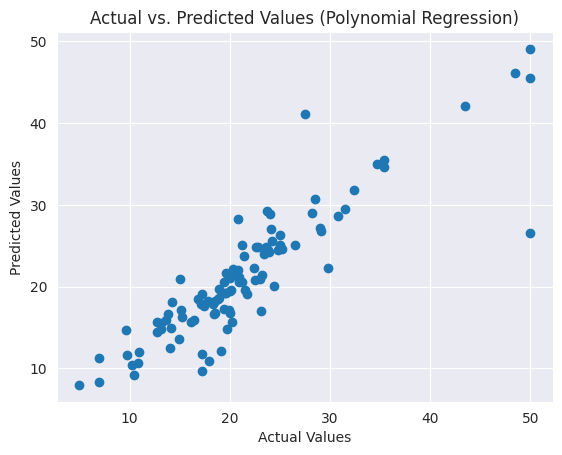

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## ran the model with plotting
# Load the dataset
# validation code
# Select specific columns as features
selected_columns = ['CRIM', 'INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
X = data[selected_columns]

# Select the target variable
y = data['MEDV']

# Split the data into training and testing sets (80/20 split)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x_train)

# Create a polynomial regression model
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

# Cross-Validation scores
cv_poly2 = cross_val_score(estimator=regressor_poly2, X=X_poly, y=y_train, cv=10)

# R2 score on the Train set
y_pred_poly2_train = regressor_poly2.predict(poly_reg.transform(x_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# R2 score on the Test set
y_pred_poly2_test = regressor_poly2.predict(poly_reg.transform(x_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# RMSE on the Test set
rmse_poly2 = np.sqrt(mean_squared_error(y_test, y_pred_poly2_test))

# Display results
print('CV:', cv_poly2.mean())
print('R2_score (train):', r2_score_poly2_train)
print('R2_score (test):', r2_score_poly2_test)
print("RMSE:", rmse_poly2)

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred_poly2_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Polynomial Regression)")
plt.show()


**OBSERVATION**

**Cross-Validation Score (CV)**: The cross-validation score of 0.790993847293378 indicates the model's performance when evaluated using cross-validation.  the model performs consistently well across different subsets of the data during cross-validation.

**R-squared Score (train):** The R-squared score of 0.8639165216408413 for the training set indicates that approximately 86.39% of the variance in the target variable is explained by the polynomial regression model when applied to the training data. This is a relatively high R-squared value, which indicates a good fit to the training data.

**R-squared Score (test):** The R-squared score of 0.7972982314821806 for the test set indicates that around 79.73% of the variance in the target variable is explained by the model when applied to unseen test data. This is a positive result and suggests that the model is able to generalize reasonably well to new data.

**Root Mean Squared Error (RMSE)**: The RMSE value of 3.855500945233932 represents the average magnitude of the errors between the predicted values and the actual values. A lower RMSE indicates better model performance. In this case, a value of 3.855 suggests that, on average, the model's predictions are about 3.855 units away from the actual value




In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#Testing the performance
# Load the dataset (Assuming 'data' is already loaded)

# Select specific columns as features
selected_columns = ['CRIM', 'INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
X = data[selected_columns]

# Select the target variable
y = data['MEDV']

# Split the data into training and testing sets (80/20 split)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x_train)

# Create a polynomial regression model
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

# Cross-Validation scores
cv_poly2 = cross_val_score(estimator=regressor_poly2, X=X_poly, y=y_train, cv=10)

# R2 score on the Train set
y_pred_poly2_train = regressor_poly2.predict(poly_reg.transform(x_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# R2 score on the Test set
y_pred_poly2_test = regressor_poly2.predict(poly_reg.transform(x_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred_poly2_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred_poly2_test)

# Calculate root mean squared error
rmse = np.sqrt(mse)

# Display results and explanations
print('Cross-Validation Scores:', cv_poly2)
print('Mean Cross-Validation Score:', cv_poly2.mean())
print('R2_score (train):', r2_score_poly2_train)
print('R2_score (test):', r2_score_poly2_test)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Interpretation
print("\nModel Performance Evaluation:")
print("A higher Cross-Validation Score indicates better generalization.")
print("R2_score closer to 1 suggests a better fit to the data.")
print("Lower values of Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error indicate accurate predictions.")


Cross-Validation Scores: [0.65175804 0.87254931 0.89437304 0.59447447 0.75840444 0.90605936
 0.89951605 0.84902481 0.85468708 0.62909186]
Mean Cross-Validation Score: 0.790993847293378
R2_score (train): 0.8639165216408413
R2_score (test): 0.7972982314821806
Mean Absolute Error: 2.381325573035515
Mean Squared Error: 14.864887538699744
Root Mean Squared Error: 3.855500945233932

Model Performance Evaluation:
A higher Cross-Validation Score indicates better generalization.
R2_score closer to 1 suggests a better fit to the data.
Lower values of Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error indicate accurate predictions.





##**Summary**

after analyzing the different model, The polynomial regression model demonstrates strongest performance across various evaluation metrics, showcasing its effectiveness in capturing and explaining the relationships within the data. The model's cross-validation score of 0.790993847293378 indicates consistent and reliable performance across different data subsets. Moreover, the high R-squared score of 0.8639165216408413 on the training set emphasizes the model's ability to explain approximately 86.39% of the variance in the target variable, showcasing a robust fit to the training data.

##**Conclusion**


In conclusion, we have completed a linear Regression, a Polynomial Regressor and Cross validation Model in this project for predicting the targeted variable MEDV in the Boston dataset.  The use of a polynomial regression model with an appropriate degree of polynomial and cross-validation yield the most accurate and reliable results. It accounts for potential non-linear patterns while providing a more robust assessment of the model's performance on various subsets of the data. It's important to remember that the success of the model also depends on the quality and representativeness of the features used and the overall context of the housing market in Boston.